In [3]:
# notebook contains rough notes and trying things out, testing modules, etc. 
# mostly not documented. 

!pip3 install matplotlib
!pip3 install numpy
!pip3 install spacepy
!pip3 install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [4]:
from spacepy import pycdf
import matplotlib.pyplot as plt
import numpy as np

f = pycdf.CDF("/Users/patrick/Dev/perceptive_techeval/data/champ-2002-2007/champ-2002/CH_OPER_DNS_ACC_2__20020101T000000_20020101T235959_0001.cdf")

In [5]:
f

<CDF:
altitude: CDF_REAL8 [8640]
density: CDF_REAL8 [8640]
density_orbitmean: CDF_REAL8 [8640]
latitude: CDF_REAL8 [8640]
local_solar_time: CDF_REAL8 [8640]
longitude: CDF_REAL8 [8640]
time: CDF_EPOCH [8640]
validity_flag: CDF_INT1 [8640]
validity_flag_orbitmean: CDF_INT1 [8640]
>

In [20]:
alt = f["altitude"][0:-1]
density = f["density"][0:-1]

density[density > 1e30] = np.nan


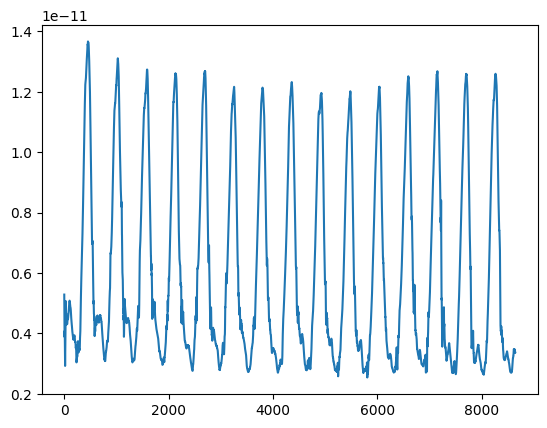

In [26]:
plt.plot(density)

In [27]:
f

<CDF:
altitude: CDF_REAL8 [8640]
density: CDF_REAL8 [8640]
density_orbitmean: CDF_REAL8 [8640]
latitude: CDF_REAL8 [8640]
local_solar_time: CDF_REAL8 [8640]
longitude: CDF_REAL8 [8640]
time: CDF_EPOCH [8640]
validity_flag: CDF_INT1 [8640]
validity_flag_orbitmean: CDF_INT1 [8640]
>

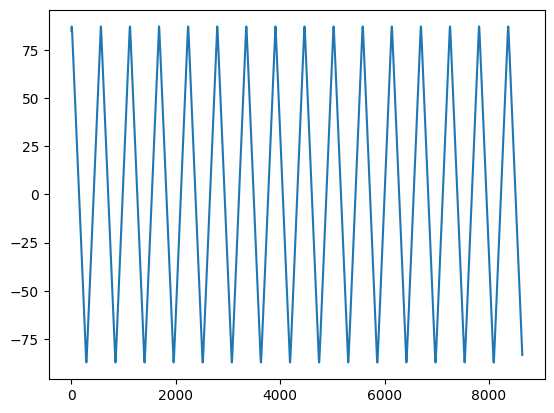

In [28]:
plt.plot(f["latitude"])

In [32]:
f["time"][0].timestamp()

1009868400.0

In [36]:
len(files)

365

In [79]:
f["latitude"][0]

85.01650291641704

In [276]:
from tqdm.notebook import tqdm
import os
import polars as pl

files = os.listdir("/Users/patrick/Dev/perceptive_techeval/data/champ-2002-2007/champ-2007/")

df_arr = []

for file in tqdm(files[0:-1]):
    alt = f["altitude"][0:-1]/1000.0
    lat = f["latitude"][0:-1]
    lon = f["longitude"][0:-1]
    lst = f["local_solar_time"][0:-1]
    density = f["density"][0:-1]
    datetime = f["time"][0:-1]
    
    unix_timestamps = [dt.timestamp() for dt in datetime]
    density[density > 1e30] = np.nan
    
    df_arr.append(pl.DataFrame({"timestamp": unix_timestamps, "altitude_km":alt, "latitude":lat, "longitude":lon, "lst":lst, "density":density}))
    
df = pl.concat(df_arr)
    
    
    

  0%|          | 0/364 [00:00<?, ?it/s]

In [277]:
df

timestamp,altitude_km,latitude,longitude,lst,density
f64,f64,f64,f64,f64,f64
1.0099e9,411.387044,85.016503,-118.387325,16.052215,5.2830e-12
1.0099e9,411.60348,85.543559,-113.879179,16.355535,5.0408e-12
1.0099e9,411.818345,86.035276,-108.201457,16.736827,4.8085e-12
1.0099e9,412.031602,86.476851,-101.004625,17.219392,4.5308e-12
1.0099e9,412.243217,86.847177,-91.932827,17.826956,4.2108e-12
…,…,…,…,…,…
1.0100e9,458.924996,-80.410061,43.802227,2.840361,3.4081e-12
1.0100e9,458.810104,-81.01908,44.924085,2.917929,3.3904e-12
1.0100e9,458.687873,-81.623937,46.213148,3.006643,3.3674e-12


In [250]:
np.log(df["density"])

density
f64
-25.966531
-26.013463
-26.060644
-26.120119
-26.193371
…
-26.404859
-26.410062
-26.416888


In [251]:
df = df.with_columns(pl.col("density").log(base=10).alias("log_density"))


In [256]:
# try something really simple first.

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer

df = df.with_columns(pl.col("altitude_km").log().alias("log_altitude")) # yeah this is a total guess here. 
y = np.array(df["density"])
X = np.array(df["altitude_km","latitude","longitude","lst"])

mask = ~np.isnan(y)
X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))

reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [257]:
y_train

array([4.08991385e-12, 3.22026590e-12, 4.20083127e-12, ...,
       1.06538665e-11, 1.06867680e-11, 3.80129144e-12])

In [258]:
reg.predict(np.array([400,30,90,12]).reshape(1,-1))

array([1.00153146e-11])

In [259]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict the values 
y_pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Absolute Error: 5.339304322378869e-13
Mean Squared Error: 4.241401116199336e-25
Root Mean Squared Error: 6.512604023122653e-13
R-squared: 0.9594842083855095


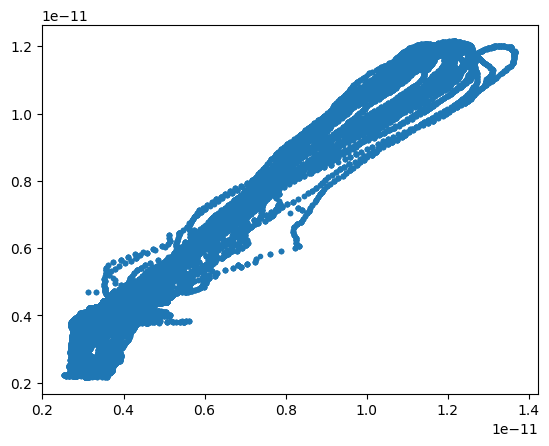

In [260]:
# just playing at this stage. of course, the "right" model needs to be brought out, parameters tuned, etc. 

N = 50000
plt.plot(y_test[0:N],y_pred[0:N],'.')

In [261]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'sgdregressor__alpha': np.logspace(-10,-6,4)
}

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='neg_root_mean_squared_error',verbose=2)


grid_search.fit(X,y)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........................sgdregressor__alpha=1e-10; total time=   2.2s
[CV] END ..........................sgdregressor__alpha=1e-10; total time=   1.7s
[CV] END ..........................sgdregressor__alpha=1e-10; total time=   1.7s
[CV] END ..........................sgdregressor__alpha=1e-10; total time=   1.8s
[CV] END ..........................sgdregressor__alpha=1e-10; total time=   1.8s
[CV] END .........sgdregressor__alpha=2.1544346900318866e-09; total time=   1.9s
[CV] END .........sgdregressor__alpha=2.1544346900318866e-09; total time=   1.9s
[CV] END .........sgdregressor__alpha=2.1544346900318866e-09; total time=   2.9s
[CV] END .........sgdregressor__alpha=2.1544346900318866e-09; total time=   2.1s
[CV] END .........sgdregressor__alpha=2.1544346900318866e-09; total time=   2.5s
[CV] END ..........sgdregressor__alpha=4.641588833612773e-08; total time=   2.2s
[CV] END ..........sgdregressor__alpha=4.64158883

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sgdregressor', SGDRegressor())]),
             param_grid={'sgdregressor__alpha': array([1.00000000e-10, 2.15443469e-09, 4.64158883e-08, 1.00000000e-06])},
             scoring='neg_root_mean_squared_error', verbose=2)

Best alpha: 4.641588833612773e-08
Best cross-validation score (MSE): 6.499786242596438e-13


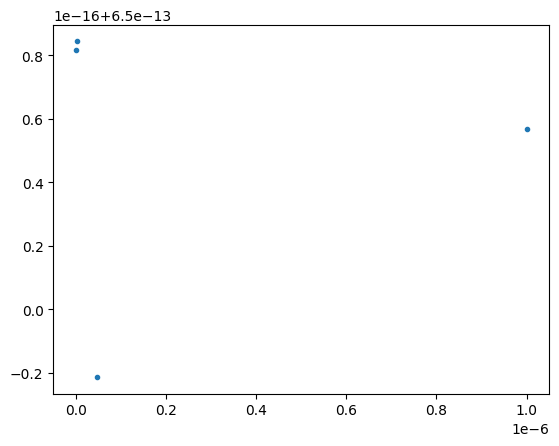

In [262]:
print(f"Best alpha: {grid_search.best_params_['sgdregressor__alpha']}")
print(f"Best cross-validation score (MSE): {-grid_search.best_score_}")

mean_test_scores = grid_search.cv_results_['mean_test_score']
alphas = param_grid['sgdregressor__alpha']

plt.plot(alphas,np.abs(mean_test_scores),'.')

In [263]:
np.logspace(-8,0,8)

array([1.00000000e-08, 1.38949549e-07, 1.93069773e-06, 2.68269580e-05,
       3.72759372e-04, 5.17947468e-03, 7.19685673e-02, 1.00000000e+00])

In [120]:
# this is probably overfit but I'm just exploring for the moment. 

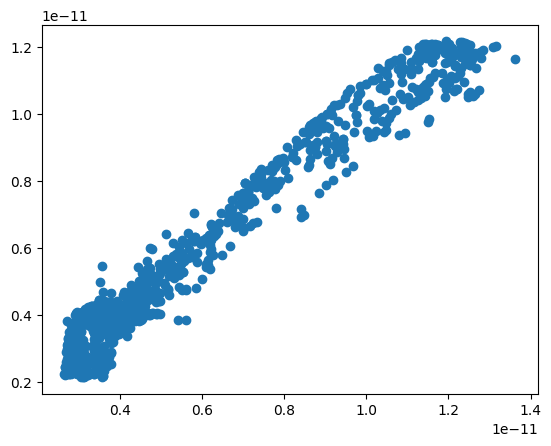

In [264]:
N = 1000
plt.scatter(y_test[0:N], grid_search.best_estimator_.predict(X_test)[0:N])

In [265]:
grid_search.best_estimator_.predict(X_test)

array([9.78231370e-12, 2.96631044e-12, 4.31092519e-12, ...,
       8.49341352e-12, 3.42031299e-12, 4.20312260e-12])

In [ ]:
from sklearn.svm import LinearSVR

svr_model = LinearSVR(C=1, epsilon=0.2)   

y = np.array(df["density"])
X = np.array(df["altitude_km","latitude","longitude","lst"])

mask = ~np.isnan(y)
X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = make_pipeline(StandardScaler(),LinearSVR())
reg.fit(X_train, y_train)         

y_pred = reg.predict(X_test)
plt.plot(y_test,y_pred,'.')

# Predict the values 
y_pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [296]:
from sklearn.datasets import make_regression

X, y = make_regression(n_features=4, random_state=0)

y

array([ -41.77258625,    3.74472441,  -95.65682744,  -25.08192828,
         27.44619319,  -31.99344805,   55.48997253, -102.29460447,
        -42.43181951,  109.24823366, -115.51683681,  101.75811405,
        -64.62792903,  -30.3170985 , -149.1655967 ,  -63.09051586,
       -112.38464968, -160.04560924,   22.91181558,   -8.14531906,
         43.82709884,  120.87813017,  153.36894347,  105.16466554,
        -96.67742181,  -29.49942263,  295.94941508,  -69.29376764,
         51.55987251,   79.10680228,  125.47144275,    1.58487072,
          9.9736833 ,  123.86299832, -151.12199636,   91.82363042,
         -6.40848085,  125.34555547, -199.72080859, -293.24954525,
        107.34834095,  -20.42851377,  100.04923452,   94.48197546,
       -112.02609264,  -36.21806093,  117.59200578, -219.83343312,
        -53.7541338 ,   94.30524146, -129.90498267,   50.34456748,
        161.67542836,  313.03644793, -154.28738026,  -66.87932541,
         58.17002978,  -61.80605604,  -79.64440992,   62.47557

In [297]:
y_test

array([8.78448990e-12, 2.73809992e-12, 4.33034886e-12, ...,
       8.45720799e-12, 3.19440160e-12, 3.50893770e-12])

In [ ]:
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
      

In [273]:
from sklearn.ensemble import GradientBoostingRegressor

y = np.array(df["density"])
X = np.array(df[["altitude_km","latitude","longitude","lst"]])

mask = ~np.isnan(y)
X = X[mask]
y = y[mask]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

gbr_model = GradientBoostingRegressor(n_estimators=500, learning_rate=1, max_depth=7, random_state=42)

gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1, max_depth=7, n_estimators=500,
                          random_state=42)

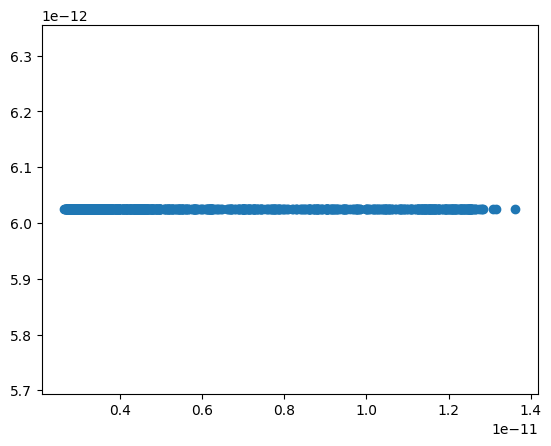

In [274]:
N = 1000
plt.scatter(y_test[0:N], gbr_model.predict(X_test)[0:N])

In [270]:
gbr_model.predict(X_test)

array([6.02454457e-12, 6.02454457e-12, 6.02454457e-12, ...,
       6.02454457e-12, 6.02454457e-12, 6.02454457e-12])

In [272]:
X_test

array([[-0.49865919, -0.55868546,  0.92221078,  0.921174  ],
       [ 0.9886322 , -0.52509924, -1.19159789, -0.9724987 ],
       [-0.14345897,  0.83948375, -0.5000237 , -1.01173742],
       ...,
       [-1.1814405 ,  1.10370836, -1.3613823 ,  0.97188635],
       [ 1.52700446, -1.5843512 , -1.27218876, -0.77374457],
       [ 0.13350873,  0.40719011,  0.51543538, -1.00671922]])

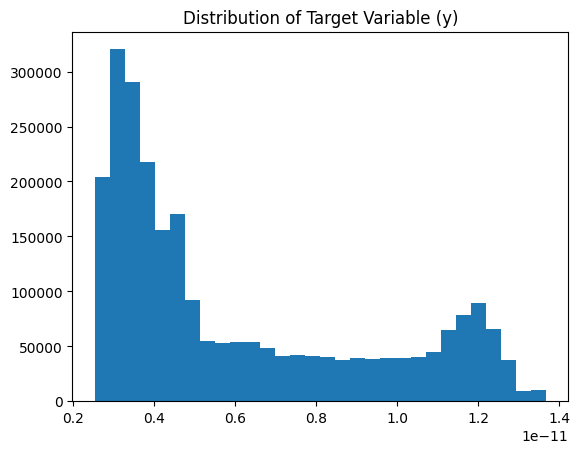

In [233]:
plt.hist(y_train, bins=30)
plt.title('Distribution of Target Variable (y)')
plt.show()

In [240]:
!pip3 install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/0e/57/900d6efd517aea09de07a22f26ec3bb757f744b96d098a24aa383d47cfb9/xgboost-2.1.2-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [242]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

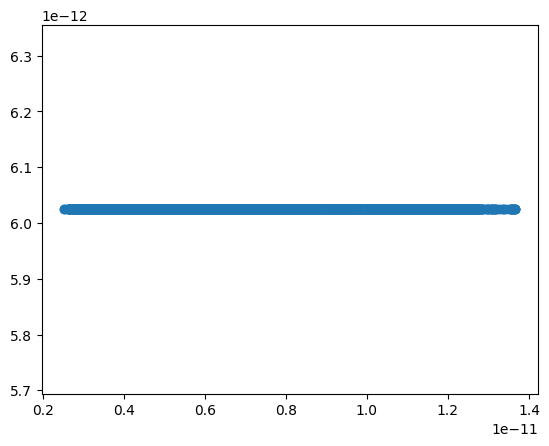

In [244]:
N = 5000
plt.scatter(y_test[0:N], xgb_model.predict(X_test)[0:N])

In [247]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_test, y_test)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [249]:
N = 5000
plt.scatter(X_test[0:N], xgb_model.predict(y_test)[0:N])

XGBoostError: [23:52:35] /Users/runner/work/xgboost/xgboost/src/predictor/cpu_predictor.cc:789: Check failed: m->NumColumns() == model.learner_model_param->num_feature (1 vs. 4) : Number of columns in data must equal to trained model.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000345c98454 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x0000000345f429dc void xgboost::predictor::CPUPredictor::DispatchedInplacePredict<xgboost::data::ArrayAdapter, 64ul>(std::__1::any const&, std::__1::shared_ptr<xgboost::DMatrix>, xgboost::gbm::GBTreeModel const&, float, xgboost::PredictionCacheEntry*, unsigned int, unsigned int) const + 344
  [bt] (2) 3   libxgboost.dylib                    0x0000000345f393c4 xgboost::predictor::CPUPredictor::InplacePredict(std::__1::shared_ptr<xgboost::DMatrix>, xgboost::gbm::GBTreeModel const&, float, xgboost::PredictionCacheEntry*, unsigned int, unsigned int) const + 1572
  [bt] (3) 4   libxgboost.dylib                    0x0000000345e666f0 xgboost::gbm::GBTree::InplacePredict(std::__1::shared_ptr<xgboost::DMatrix>, float, xgboost::PredictionCacheEntry*, int, int) const + 740
  [bt] (4) 5   libxgboost.dylib                    0x0000000345e849e4 xgboost::LearnerImpl::InplacePredict(std::__1::shared_ptr<xgboost::DMatrix>, xgboost::PredictionType, float, xgboost::HostDeviceVector<float>**, int, int) + 164
  [bt] (5) 6   libxgboost.dylib                    0x0000000345d1a5fc InplacePredictImpl(std::__1::shared_ptr<xgboost::DMatrix>, char const*, xgboost::Learner*, unsigned long long const**, unsigned long long*, float const**) + 276
  [bt] (6) 7   libxgboost.dylib                    0x0000000345d1ac58 XGBoosterPredictFromDense + 420
  [bt] (7) 8   libffi.dylib                        0x00000001ad3b9050 ffi_call_SYSV + 80
  [bt] (8) 9   libffi.dylib                        0x00000001ad3c1b04 ffi_call_int + 1208

